# Author Rahul Singh
Email ID - rs0089286@gmail.com

### @SKILLENABLE

### In this case study, we will explore the Titanic dataset, which contains information about passengers who were on board the Titanic ship during its infamous maiden voyage in 1912. The goal of this case study is to answer the following questions:

* Q.1- How many rows and columns are there in the dataset?
* Q.2- In which class category more number of women’s died in terms of percentage of from that class?
* Q.3- Was the oldest passenger a male or a female?
* Q.4- What is the name of the oldest survived female passenger?
* Q.5- What are the details of the youngest passenger who did not survive?
* Q.6- What percentage of passengers overall survived the disaster?
* Q.7- Which sex of passengers were more on board?
* Q.8- Which passenger had the least average age by ticket class?
* Q.9- Which class had the highest fare?
* Q.10- Which class had the highest number of passengers?
#### We will use the Pandas library and Numpy in Python to load, manipulate, and analyze the Titanic dataset. We will also use data visualization tools to help us better understand the data and answer the questions posed above. Let's get started!

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure Visualizations
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q.1- How many rows and columns are there in the dataset?

In [3]:
titanic_df.shape
#titanic_df.descibe --we can also use describe finction to describe the data.

(891, 12)

**Ans - [891 rows x 12 columns]**

### Q.2- In which class category more number of women’s died in terms of percentage of from that class?

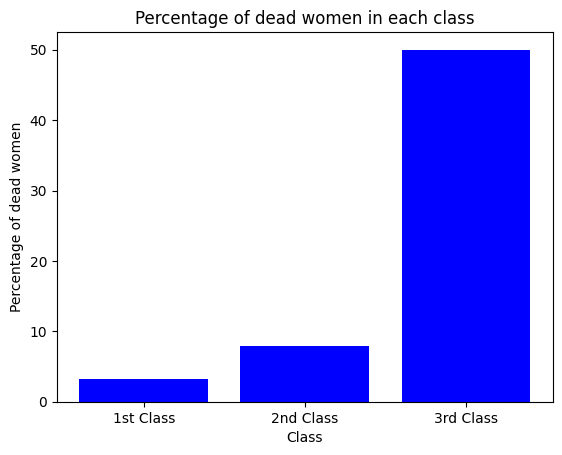

In [4]:
class_sex_group = titanic_df.groupby(['Pclass', 'Sex'])
women_by_class = class_sex_group['Survived'].count().loc[:, 'female']
dead_women_by_class = women_by_class - class_sex_group['Survived'].sum().loc[:, 'female']
women_dead_percent_by_class = (dead_women_by_class/women_by_class)*100

fig, ax = plt.subplots()
ax.bar(women_dead_percent_by_class.index.get_level_values('Pclass'), women_dead_percent_by_class.values,color='Blue')
ax.set_xlabel('Class')
ax.set_ylabel('Percentage of dead women')
ax.set_title('Percentage of dead women in each class')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
plt.show()

### Q.3- Was the oldest passenger a male or a female?

In [5]:
oldest_passenger = titanic_df.sort_values('Age', ascending=False).iloc[0]
print("The oldest passenger was a", oldest_passenger['Sex'].lower(),"named",oldest_passenger['Name'].lower() ,"and was", oldest_passenger['Age'], "years old.")

The oldest passenger was a male named barkworth, mr. algernon henry wilson and was 80.0 years old.


**The oldest passenger was a male named barkworth, mr. algernon henry wilson and was 80.0 years old.**

### Q.4- What is the name of the oldest survived female passenger?

In [6]:
oldest_survived_female = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Survived'] == 1)].sort_values('Age', ascending=False).iloc[0]
print("The name of the oldest survived female passenger is:", oldest_survived_female['Name'],"and her age is ",oldest_survived_female['Age'])


The name of the oldest survived female passenger is: Turkula, Mrs. (Hedwig) and her age is  63.0


**The name of the oldest survived female passenger is: Turkula, Mrs. (Hedwig) and her age is  63.0.**

### Q.5- What are the details of the youngest passenger who did not survive?

In [7]:
youngest_not_survived_passenger = titanic_df[(titanic_df['Survived'] == 0)].sort_values('Age', ascending=True).iloc[0]
print("The youngest passenger who did not survive was",youngest_not_survived_passenger['Name'],
      ', aged',youngest_not_survived_passenger['Age'],'years,','He had a ticket with number-',
      youngest_not_survived_passenger['Ticket'], 'and his cabin number was-',
      youngest_not_survived_passenger['Cabin'], ". He belonged to class ",
      youngest_not_survived_passenger['Pclass']
      ,'. His Passenger ID was',youngest_not_survived_passenger['PassengerId'],'.')

The youngest passenger who did not survive was Panula, Master. Eino Viljami , aged 1.0 years, He had a ticket with number- 3101295 and his cabin number was- nan . He belonged to class  3 . His Passenger ID was 165 .


**The youngest passenger who did not survive was Panula, Master. Eino Viljami ,aged 1.0 years, He had a ticket with number- 3101295 and his cabin number was- nan. He belonged to class 3. His Passenger ID was 165.**

### Q.6- What percentage of passengers overall survived the disaster?

In [8]:
survival_counts = titanic_df['Survived'].value_counts()
survival_percent = survival_counts[1] / titanic_df.shape[0] * 100
print("Percentage of passengers who survived: {:.2f}%".format(survival_percent))
                                       

Percentage of passengers who survived: 38.38%


***Percentage of passengers who survived: 38.38%***

### Q.7- Which sex of passengers were more on board?

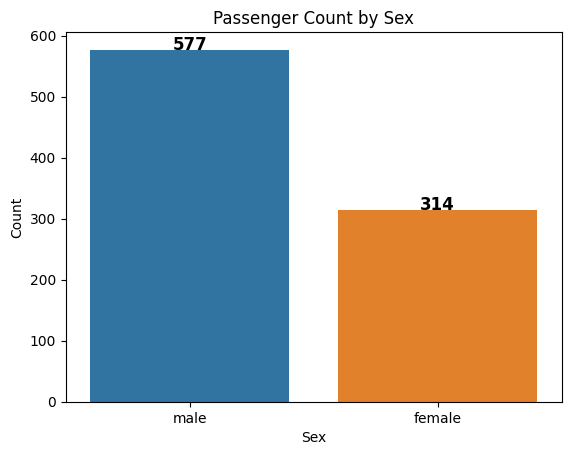

In [9]:
sns.countplot(x='Sex', data=titanic_df)
counts = titanic_df['Sex'].value_counts()
for i, count in enumerate(counts):
    plt.annotate(str(count), xy=(i, count), ha='center', fontsize=12, fontweight='bold')

plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

### Q.8- Which passenger had the least average age by ticket class?

In [10]:
class_mean_age = titanic_df.groupby('Pclass')['Age'].mean()

class_with_lowest_age = class_mean_age.idxmin()

print("The passenger with the least average age by ticket class was in class", class_with_lowest_age)

The passenger with the least average age by ticket class was in class 3


***The passenger with the least average age by ticket class was in class 3***

### Q.9- Which class had the highest fare?

In [11]:
class_fare = titanic_df.groupby('Pclass')['Fare'].max()
print("Class with the highest fare:", class_fare.idxmax())

Class with the highest fare: 1


***Class with the highest fare: 1***

### Q.10- Which class had the highest number of passengers?

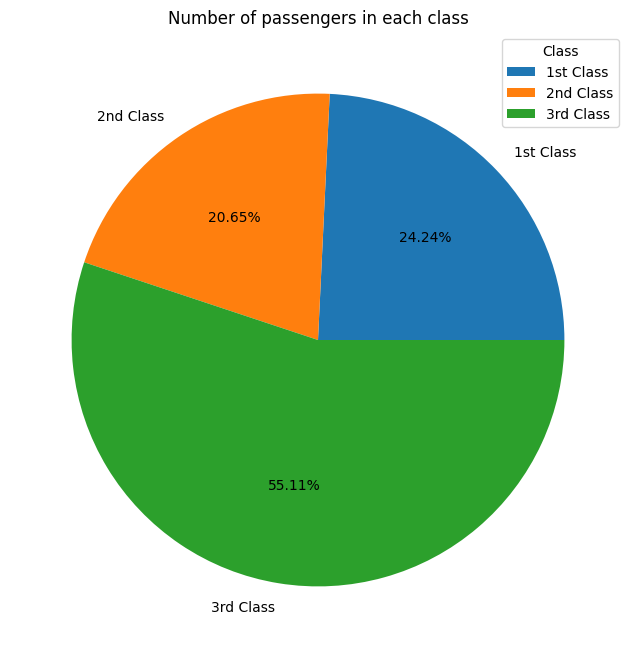

In [12]:
no_of_passenger = titanic_df.groupby('Pclass')['Ticket'].count()
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(no_of_passenger.values, labels=['1st Class', '2nd Class', '3rd Class'], autopct='%1.2f%%')
ax.set_title('Number of passengers in each class')
ax.legend(title="Class", loc="upper right")
plt.show()

#### In this case study, we analyzed the Titanic dataset using Python's pandas library and various visualization tools. We explored different aspects of the dataset such as the survival rates, ticket class, and fare. Through this analysis, we were able to gain insights into the factors that influenced survival and the overall characteristics of the passengers on board the Titanic. Overall, this case study provides a practical example of how data analysis can be applied to real-world datasets to uncover valuable insights.

# Thank You